In [21]:
data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

Andrew  Beth  Catherine  Chris  Dave  Drew  Gary  Jerrod  \
aa                0     0          0      0     0     0     2       0   
aah               1     0          0      0     1     0     0       0   
abandoned         0     0          0      0     0     1     0       1   
abbreviated       0     0          0      0     0     0     0       0   
abducted          0     0          0      0     0     0     0       0   

             Kathleen  Kevin  Larry  Orny  Patton  Pete  Ricky  Roywood  \
aa                  0      0      0     0       0     0      0        0   
aah                 0      0      1     0       0     1      0        0   
abandoned           0      0      0     0       0     0      0        0   
abbreviated         0      0      0     3       0     0      0        0   
abducted            1      0      0     0       0     0      0        0   

             Sammy  Sarah  Tom  Trevor  
aa               0      0    0       0  
aah              0      0    0       0  
abandoned        0      1    0       0  
abbreviated      0      0    0       0  
abducted         0      0    0       0

In [22]:
data.columns

Index(['Andrew', 'Beth', 'Catherine', 'Chris', 'Dave', 'Drew', 'Gary',
       'Jerrod', 'Kathleen', 'Kevin', 'Larry', 'Orny', 'Patton', 'Pete',
       'Ricky', 'Roywood', 'Sammy', 'Sarah', 'Tom', 'Trevor'],
      dtype='object')

In [23]:
#Top 30 words by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30) # Sort values in descending order
    top_dict[c]= list(zip(top.index, top.values)) # List of tuples containing the index and values

top_dict

{'Andrew': [('like', 264),
  ('know', 90),
  ('im', 85),
  ('thats', 81),
  ('dont', 64),
  ('man', 62),
  ('got', 61),
  ('shit', 54),
  ('want', 54),
  ('right', 54),
  ('youre', 53),
  ('guy', 52),
  ('people', 49),
  ('gonna', 42),
  ('good', 41),
  ('guys', 39),
  ('say', 37),
  ('okay', 37),
  ('just', 36),
  ('fuck', 36),
  ('really', 36),
  ('thing', 34),
  ('theyre', 32),
  ('black', 32),
  ('cause', 29),
  ('think', 29),
  ('come', 26),
  ('hey', 26),
  ('gay', 26),
  ('mean', 25)],
 'Beth': [('like', 201),
  ('just', 82),
  ('im', 69),
  ('dont', 55),
  ('know', 49),
  ('youre', 31),
  ('think', 30),
  ('going', 23),
  ('people', 22),
  ('feel', 21),
  ('sex', 21),
  ('thats', 21),
  ('hes', 19),
  ('theres', 19),
  ('got', 18),
  ('maybe', 17),
  ('mom', 17),
  ('theyre', 17),
  ('did', 16),
  ('time', 16),
  ('good', 16),
  ('woman', 16),
  ('said', 15),
  ('dad', 15),
  ('say', 15),
  ('doing', 14),
  ('want', 14),
  ('lot', 14),
  ('cause', 14),
  ('look', 14)],
 'Cather

In [24]:
#Top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:15]])) # Unpacking each tuple into word and count, but only selecting word
    print('---')

Andrew
like, know, im, thats, dont, man, got, shit, want, right, youre, guy, people, gonna, good
---
Beth
like, just, im, dont, know, youre, think, going, people, feel, sex, thats, hes, theres, got
---
Catherine
like, im, look, just, want, oh, know, dont, thats, ill, really, think, love, say, money
---
Chris
like, got, know, weve, president, right, okay, man, mean, people, hes, going, thats, tuesday, trump
---
Dave
know, im, like, said, man, tell, everybody, ngga, didnt, just, dont, time, right, shit, thats
---
Drew
like, audience, chuckling, laughing, dont, just, know, im, people, thats, think, youre, oh, fuck, wanna
---
Gary
just, people, like, say, dont, im, said, poor, know, youre, gonna, think, work, got, wanna
---
Jerrod
like, im, know, just, really, dont, thats, mom, think, dad, love, shit, lot, feel, shes
---
Kathleen
im, dont, know, like, gonna, thats, just, people, youre, cause, said, thought, think, really, say
---
Kevin
like, know, just, dont, im, thats, right, goes, youre,

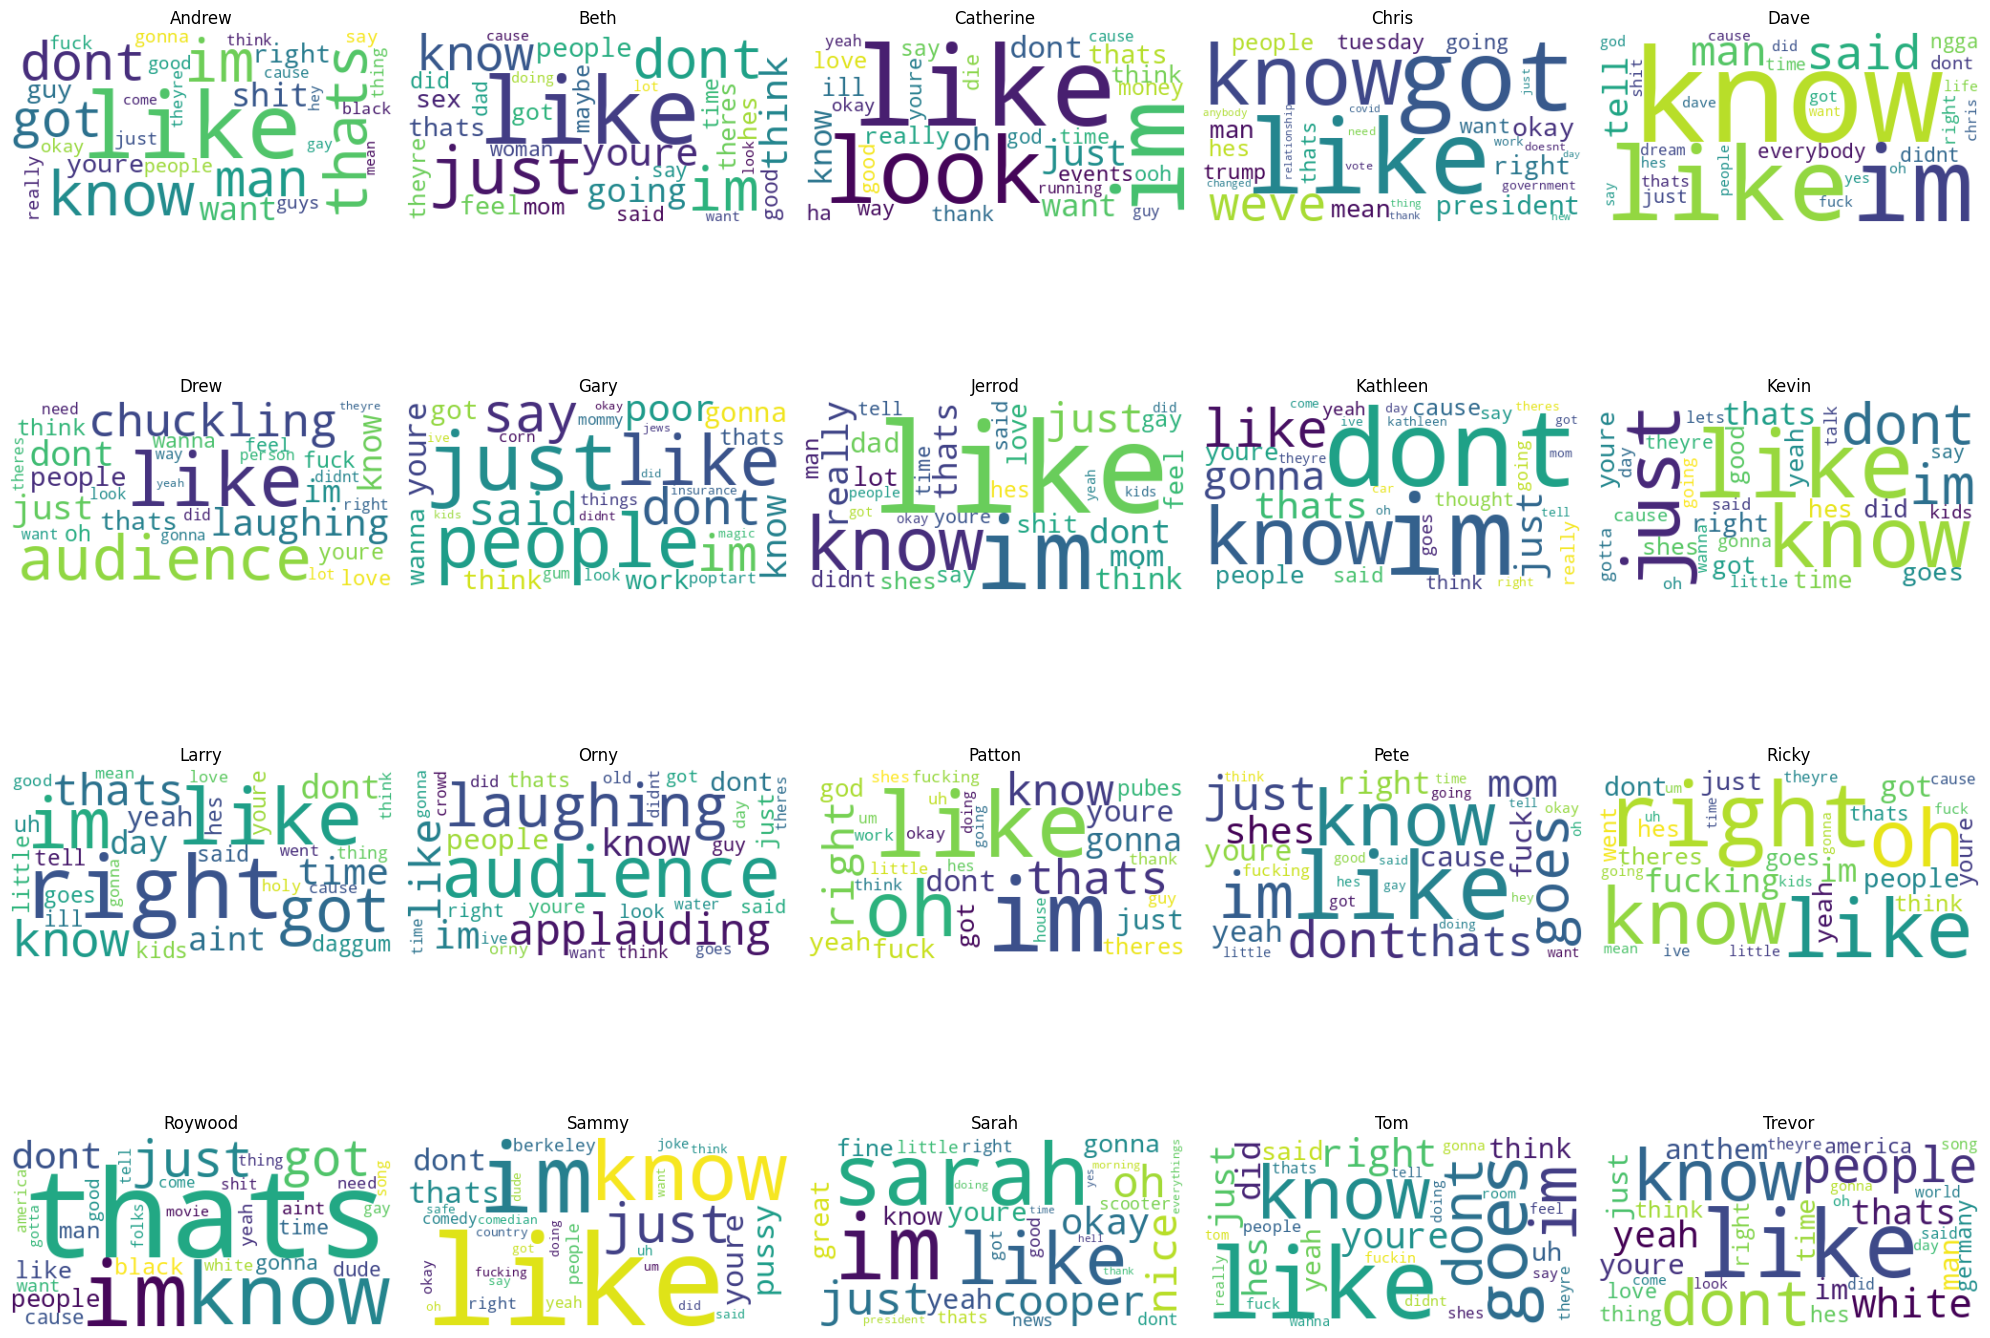

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

num_rows = 4
num_cols = 5

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 16))

for i, (comedian, top_words) in enumerate(top_dict.items()):
    row = i // num_cols
    col = i % num_cols

    # Extract words and their frequencies from the comedian's top words
    words = {word: count for word, count in top_words}

    wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(words)

    axs[row, col].imshow(wordcloud, interpolation='bilinear')
    axs[row, col].set_title(comedian)
    axs[row, col].axis('off') # To remove unnecessary ticks and labels.

plt.tight_layout()
plt.show()

In [26]:
from collections import Counter

words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
words

['like',
 'know',
 'im',
 'thats',
 'dont',
 'man',
 'got',
 'shit',
 'want',
 'right',
 'youre',
 'guy',
 'people',
 'gonna',
 'good',
 'guys',
 'say',
 'okay',
 'just',
 'fuck',
 'really',
 'thing',
 'theyre',
 'black',
 'cause',
 'think',
 'come',
 'hey',
 'gay',
 'mean',
 'like',
 'just',
 'im',
 'dont',
 'know',
 'youre',
 'think',
 'going',
 'people',
 'feel',
 'sex',
 'thats',
 'hes',
 'theres',
 'got',
 'maybe',
 'mom',
 'theyre',
 'did',
 'time',
 'good',
 'woman',
 'said',
 'dad',
 'say',
 'doing',
 'want',
 'lot',
 'cause',
 'look',
 'like',
 'im',
 'look',
 'just',
 'want',
 'oh',
 'know',
 'dont',
 'thats',
 'ill',
 'really',
 'think',
 'love',
 'say',
 'money',
 'die',
 'way',
 'ooh',
 'thank',
 'events',
 'youre',
 'time',
 'ha',
 'good',
 'god',
 'okay',
 'running',
 'cause',
 'guy',
 'yeah',
 'like',
 'got',
 'know',
 'weve',
 'president',
 'right',
 'okay',
 'man',
 'mean',
 'people',
 'hes',
 'going',
 'thats',
 'tuesday',
 'trump',
 'want',
 'government',
 'work',
 

In [27]:
Counter(words).most_common()

[('like', 20),
 ('know', 20),
 ('thats', 20),
 ('im', 19),
 ('dont', 19),
 ('just', 19),
 ('youre', 17),
 ('got', 16),
 ('right', 15),
 ('think', 15),
 ('people', 14),
 ('yeah', 14),
 ('gonna', 13),
 ('time', 12),
 ('said', 12),
 ('hes', 11),
 ('oh', 11),
 ('want', 10),
 ('say', 10),
 ('cause', 10),
 ('did', 10),
 ('okay', 9),
 ('good', 8),
 ('theyre', 8),
 ('fuck', 7),
 ('going', 7),
 ('tell', 7),
 ('goes', 7),
 ('man', 6),
 ('theres', 6),
 ('doing', 6),
 ('look', 6),
 ('day', 6),
 ('didnt', 6),
 ('little', 6),
 ('really', 5),
 ('thing', 5),
 ('love', 5),
 ('kids', 5),
 ('shes', 5),
 ('uh', 5),
 ('shit', 4),
 ('guy', 4),
 ('come', 4),
 ('gay', 4),
 ('mean', 4),
 ('feel', 4),
 ('mom', 4),
 ('thank', 4),
 ('wanna', 4),
 ('ive', 4),
 ('fucking', 4),
 ('lot', 3),
 ('god', 3),
 ('work', 3),
 ('need', 3),
 ('um', 3),
 ('black', 2),
 ('hey', 2),
 ('dad', 2),
 ('ill', 2),
 ('way', 2),
 ('president', 2),
 ('yes', 2),
 ('audience', 2),
 ('laughing', 2),
 ('gotta', 2),
 ('aint', 2),
 ('went', 2)

In [28]:
add_stop_words = [word for word, count in Counter(words).most_common() if count > 11]
add_stop_words

['like',
 'know',
 'thats',
 'im',
 'dont',
 'just',
 'youre',
 'got',
 'right',
 'think',
 'people',
 'yeah',
 'gonna',
 'time',
 'said']

In [29]:
from sklearn.feature_extraction import text

data_clean = pd.read_pickle('data_clean.pkl')
stop_words = list(text.ENGLISH_STOP_WORDS.union(add_stop_words))

# Recreating document-term matrix with updated stop words
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out()) # The column names are obtained using cv.get_feature_names_out()
data_stop.index = data_clean.index

pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [30]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",max_font_size=150, random_state=42)

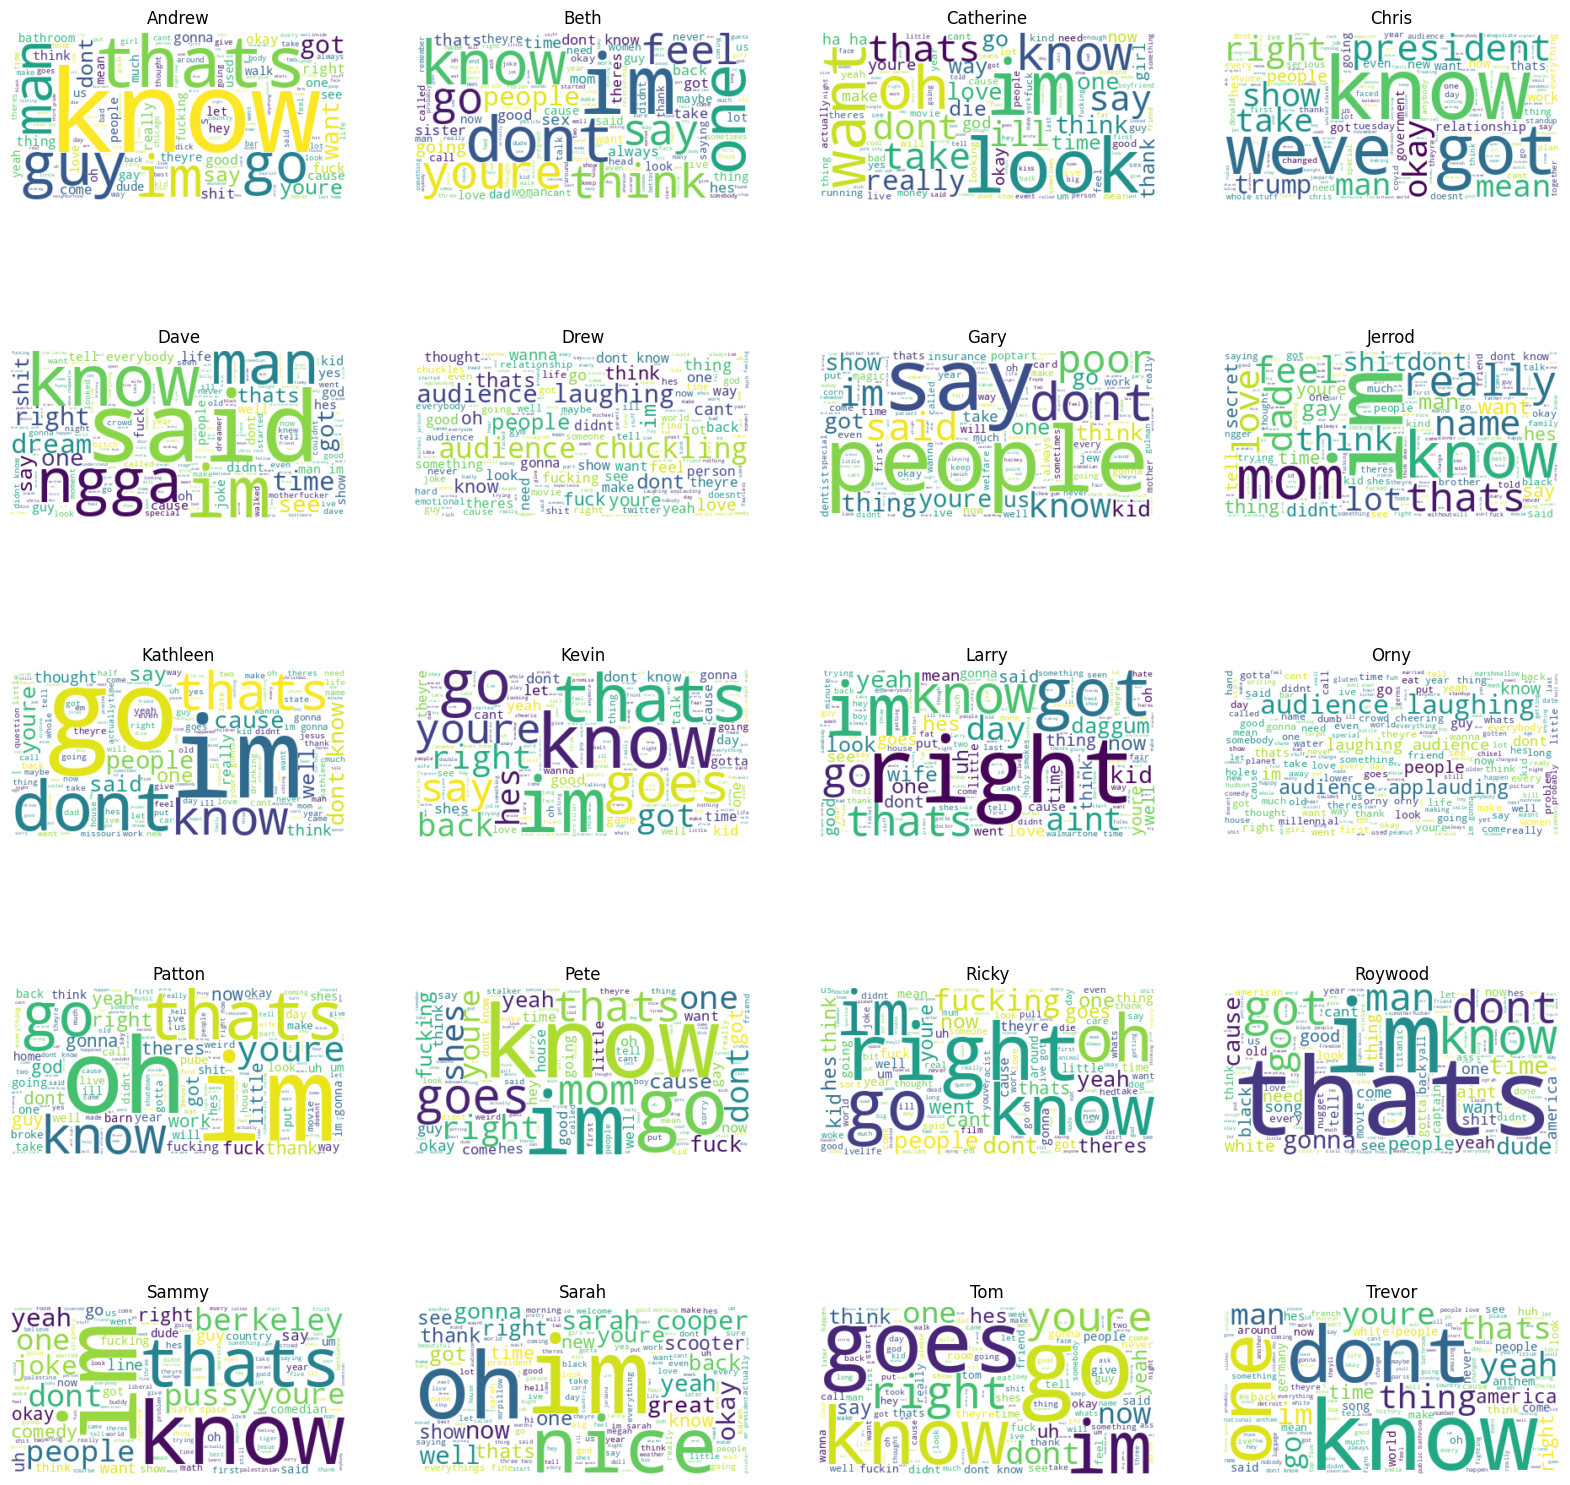

In [31]:
plt.rcParams['figure.figsize'] = [20, 20]

full_names = ['Kevin','Pete','Sammy','Dave','Ricky','Gary','Trevor','Beth','Andrew','Tom','Drew','Sarah','Larry','Chris','Roywood','Catherine','Jerrod','Kathleen','Orny','Patton']
full_names.sort()
wc = WordCloud(background_color="white", contour_color='purple', contour_width=3)

for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian]) # Generates a word cloud for the current comedian using their transcript data from data_clean

    plt.subplot(5, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])

plt.show()

Observations :-
1. Comedian Jerrod often incorporates anecdotes about his family . He , I guess expresses some lines for his parents, stating something like, "I really love mom and dad." This sentiment is reflected in his wordcloud.
2. Beth mentions, "I don't know, you're the one," suggesting that he is addressing someone unexpected or previously unconsidered as a significant figure.
3. Across various comedic performances, the words 'know' , 'im' and 'right' emerge as most spoken words.
4. Many comedians frequently incorporate profanity such as the f-word and s-word into their performances.
5. Orny and Drew share common thinking, often expressing similar ideas with nearly identical wording. This is evident in their word clouds, where both comedians represent audience laughter prominently. Furthermore, upon examination of their respective word clouds, no single word appears to dominate in terms of frequency.

In [32]:
# Number of unique words that each comedian uses

unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

comedian  unique_words
3       Chris           334
7      Jerrod           868
15    Roywood           990
18        Tom          1120
16      Sammy          1164
4        Dave          1209
13       Pete          1245
19     Trevor          1264
17      Sarah          1301
2   Catherine          1337
9       Kevin          1392
0      Andrew          1410
12     Patton          1451
6        Gary          1474
5        Drew          1491
1        Beth          1497
11       Orny          1500
14      Ricky          1588
8    Kathleen          1611
10      Larry          1657

In [33]:
# Calculating the words per minute of each comediam
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian]) # Calculates the total number of words used by the current comedian by summing up their word counts.
    total_list.append(totals)

run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 55, 48, 75, 84, 70, 55, 84, 66, 90, 78]

data_words = pd.DataFrame(index=data.columns)

data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']
data_wpm_sort = data_words.sort_values(by='words_per_minute')

print(data_wpm_sort)

           total_words  run_times  words_per_minute
Chris              616         60         10.266667
Tom               3073         90         34.144444
Jerrod            2334         63         37.047619
Sammy             3152         84         37.523810
Gary              3163         77         41.077922
Pete              3892         84         46.333333
Catherine         3831         80         47.887500
Patton            3677         75         49.026667
Sarah             3301         66         50.015152
Dave              3469         67         51.776119
Trevor            4226         78         54.179487
Roywood           3002         55         54.581818
Drew              4256         73         58.301370
Beth              3675         59         62.288136
Ricky             4735         70         67.642857
Kevin             4133         58         71.258621
Kathleen          4804         62         77.483871
Larry             4647         55         84.490909
Andrew      

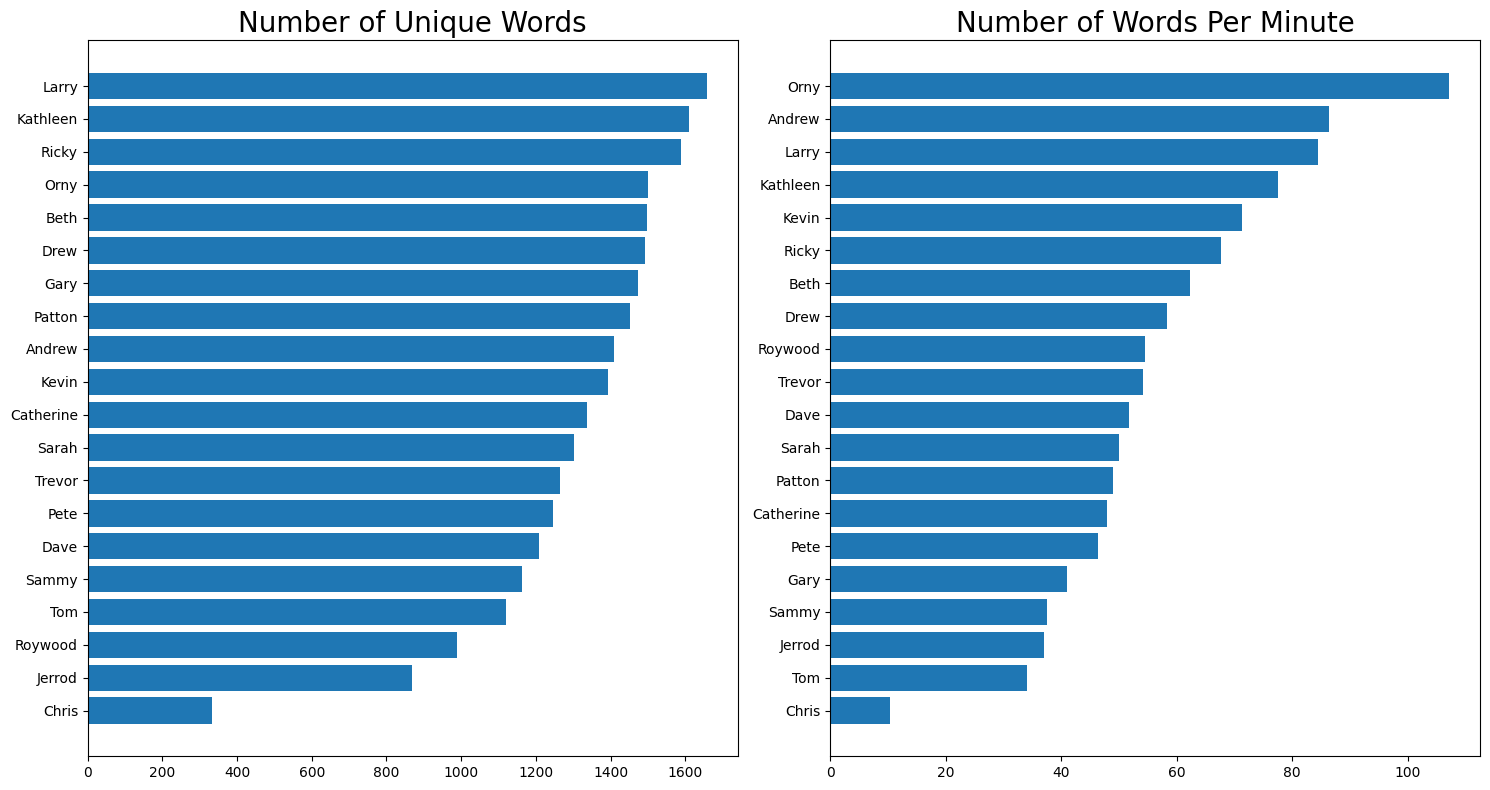

In [34]:
plt.figure(figsize=(15, 8))

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.index)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

Observations :-  

* Vocabulary
  1. Larry and Kathleen have a robust vocabulary, as they employ a plethora of unique words.
  2. As for Beth , he stands at 5 position in speaking unique words which indicates he alo have excellent vocabulary.
  3. Chris has least vocabulary among all comedians.
* Talking Speed
  1. Andrew and Orny speak at a brisk pace.
  2. Beth has moderate talking speed with 62 words per minute.

In [35]:
# Taking a look at the most common words again.
Counter(words).most_common()

[('like', 20),
 ('know', 20),
 ('thats', 20),
 ('im', 19),
 ('dont', 19),
 ('just', 19),
 ('youre', 17),
 ('got', 16),
 ('right', 15),
 ('think', 15),
 ('people', 14),
 ('yeah', 14),
 ('gonna', 13),
 ('time', 12),
 ('said', 12),
 ('hes', 11),
 ('oh', 11),
 ('want', 10),
 ('say', 10),
 ('cause', 10),
 ('did', 10),
 ('okay', 9),
 ('good', 8),
 ('theyre', 8),
 ('fuck', 7),
 ('going', 7),
 ('tell', 7),
 ('goes', 7),
 ('man', 6),
 ('theres', 6),
 ('doing', 6),
 ('look', 6),
 ('day', 6),
 ('didnt', 6),
 ('little', 6),
 ('really', 5),
 ('thing', 5),
 ('love', 5),
 ('kids', 5),
 ('shes', 5),
 ('uh', 5),
 ('shit', 4),
 ('guy', 4),
 ('come', 4),
 ('gay', 4),
 ('mean', 4),
 ('feel', 4),
 ('mom', 4),
 ('thank', 4),
 ('wanna', 4),
 ('ive', 4),
 ('fucking', 4),
 ('lot', 3),
 ('god', 3),
 ('work', 3),
 ('need', 3),
 ('um', 3),
 ('black', 2),
 ('hey', 2),
 ('dad', 2),
 ('ill', 2),
 ('way', 2),
 ('president', 2),
 ('yes', 2),
 ('audience', 2),
 ('laughing', 2),
 ('gotta', 2),
 ('aint', 2),
 ('went', 2)

In [36]:
# Isolating bad words
data_bad_words = data.transpose()[['fuckin', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fuckin + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

f_word  s_word
Andrew         36      54
Beth            9       0
Catherine      15       8
Chris           0       0
Dave           19      23
Drew           32      11
Gary            0       2
Jerrod          8      21
Kathleen        6       5
Kevin           0       0
Larry           0       1
Orny            0       6
Patton         25      14
Pete           35       8
Ricky          25      10
Roywood         2      17
Sammy           7       8
Sarah           1       4
Tom            33       9
Trevor          0       2

<ipython-input-37-dde7315f9202>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(data_profanity['f_word'][i] + 0.5, data_profanity['s_word'][i] + 0.5, comedian, fontsize=8)


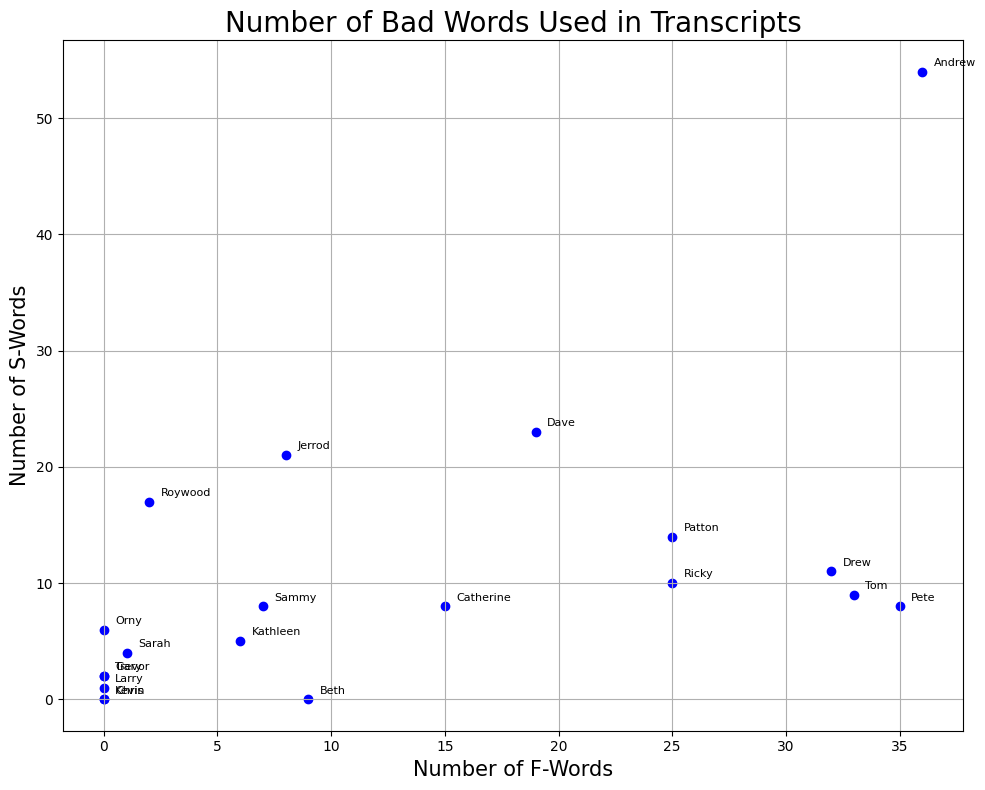

In [37]:
comedian_names = ['Kevin','Pete','Sammy','Dave','Ricky','Gary','Trevor','Beth','Andrew','Tom','Drew','Sarah','Larry','Chris','Roywood','Catherine','Jerrod','Kathleen','Orny','Patton']
comedian_names.sort()

plt.figure(figsize=(10, 8))
plt.scatter(data_profanity['f_word'], data_profanity['s_word'], color='blue')

for i, comedian in enumerate(comedian_names):
    plt.text(data_profanity['f_word'][i] + 0.5, data_profanity['s_word'][i] + 0.5, comedian, fontsize=8)

plt.title('Number of Bad Words Used in Transcripts', fontsize=20)
plt.xlabel('Number of F-Words', fontsize=15)
plt.ylabel('Number of S-Words', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()

* I dislike comedians who frequently use profanity, such as Andrew, Drew, Tom, and Pete. Perhaps due to their excessive use of profanity, they may have lower popularity, as I'm not familiar with them.

* In the realm of comedy, I find myself drawn to the elegance of clean humor. It appears that profanity might serve as a reliable marker for the type of comedy that resonates with me. Among this group, besides Beth, my admiration extends to Larry and Sarah, who are my another favourite comedians.
* This scatterplot visually represents the usage of profanity in comedy, specifically focusing on the occurrence of 'f words' and 's words'. It serves as a valuable tool for individuals to assess their preferred comedians' language. Such insights can be beneficial in real-life scenarios, particularly for avoiding exposure to comedians who frequently use profanity, especially in the presence of small children, as they might mimic such vulgar language.